<a href="https://colab.research.google.com/github/Ragnarok540/music/blob/main/src/wavetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
from IPython.display import Audio
import matplotlib.pyplot as plt

# Wavetable

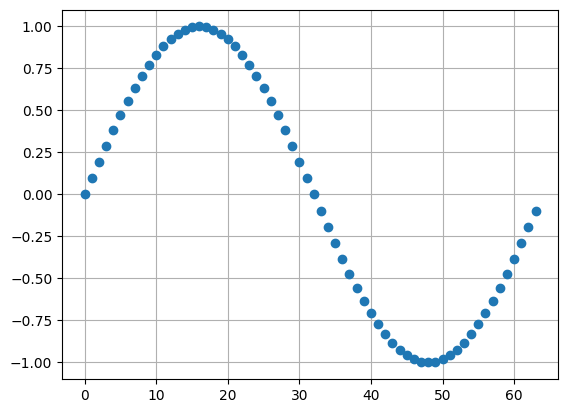

In [97]:
def saw(x):
    return (x + np.pi) / np.pi % 2 - 1


def square(x):
    return np.sign(np.sin(x)) * 0.5


def triangle(x):
    return np.arcsin(np.sin(x)) * 0.5


def create_wavetable(waveform: str = 'sine',
                     length: int = 64) -> np.ndarray:
    wavetable = np.zeros((length,))

    match waveform:
        case 'sine' | 'sin':
            wave = np.sin
        case 'sawtooth' | 'saw':
            wave = saw
        case 'square':
            wave = square
        case 'triangle':
            wave = triangle
        case _:
            raise Exception(f'waveform "{waveform}" not implemented')

    for n in range(length):
        wavetable[n] = wave(2 * np.pi * n / length)

    return wavetable

def plot_wave(signal, start=0, end=100):
    plt.grid(True)
    plt.plot(signal[start:end], 'o')
    plt.show()

def plot_signal(signal, start=0, end=250):
    plt.figure(figsize=(15, 2))
    plt.grid(True)
    plt.plot(signal[start:end])
    plt.show()

sample_rate = 44100
wavetable_length = 64

waveform = 'sin'
# waveform = 'saw'
# waveform = 'square'
# waveform = 'triangle'

wavetable = create_wavetable(waveform, wavetable_length)
plot_wave(wavetable, end=wavetable_length)

# Wavetable Synthesis

In [86]:
def interpolate_linearly(wavetable, index):
    truncated_index = int(np.floor(index))
    next_index = (truncated_index + 1) % wavetable.shape[0]
    next_index_weight = index - truncated_index
    truncated_index_weight = 1 - next_index_weight

    return truncated_index_weight * wavetable[truncated_index] + \
        next_index_weight * wavetable[next_index]


def wavetable_synthesis(wavetable: np.ndarray,
                        sample_rate: int = 44100,
                        frequency: int = 440,
                        duration: float = 3,
                        interpolate: bool = False) -> np.ndarray:
    output = np.zeros((duration * sample_rate,))
    index = 0
    increment = frequency * wavetable.shape[0] / sample_rate

    for n in range(output.shape[0]):
        if interpolate:
            output[n] = interpolate_linearly(wavetable, index)
        else:
            output[n] = wavetable[int(np.floor(index))]
        index += increment
        index %= wavetable.shape[0]

    return output

In [87]:
output = wavetable_synthesis(wavetable, sample_rate)
Audio(output, rate=sample_rate)

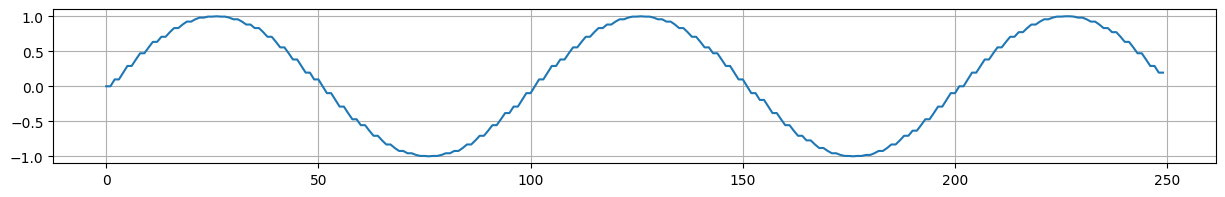

In [88]:
plot_signal(output)

# Scaling

In [89]:
def scale_signal(signal: np.ndarray,
                 gain: int = -20) -> np.ndarray:
    output = signal.copy()
    amplitude = 10 ** (gain / 20)
    output *= amplitude

    return output

scaled_output = scale_signal(output)
Audio(scaled_output, rate=sample_rate)

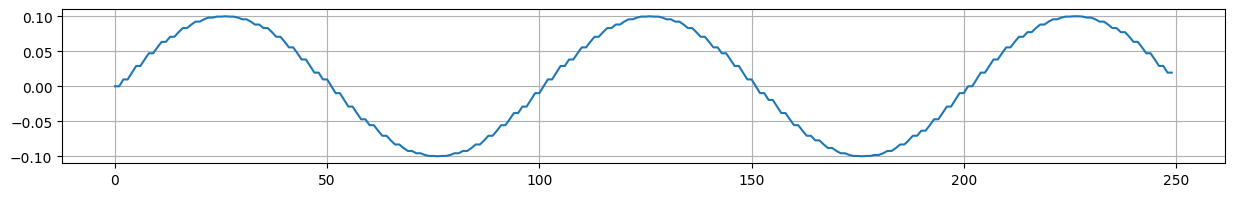

In [90]:
plot_signal(scaled_output)

# Interpolation

In [91]:
interpolated_output = wavetable_synthesis(wavetable,
                                          sample_rate,
                                          interpolate=True)
interpolated_scaled_output = scale_signal(interpolated_output)
Audio(interpolated_scaled_output, rate=sample_rate)

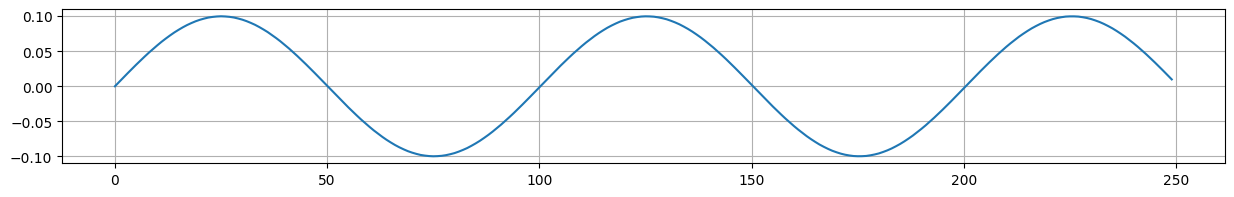

In [92]:
plot_signal(interpolated_scaled_output)

# Fading

In [93]:
def fade_in_out(signal, fade_length=1000):
    fade_in = (1 - np.cos(np.linspace(0, np.pi, fade_length))) * 0.5
    fade_out = np.flip(fade_in)

    signal[:fade_length] = np.multiply(fade_in, signal[:fade_length])
    signal[-fade_length:] = np.multiply(fade_out, signal[-fade_length:])

    return signal

faded_interpolated_scaled_output = fade_in_out(interpolated_scaled_output)
Audio(faded_interpolated_scaled_output, rate=sample_rate)

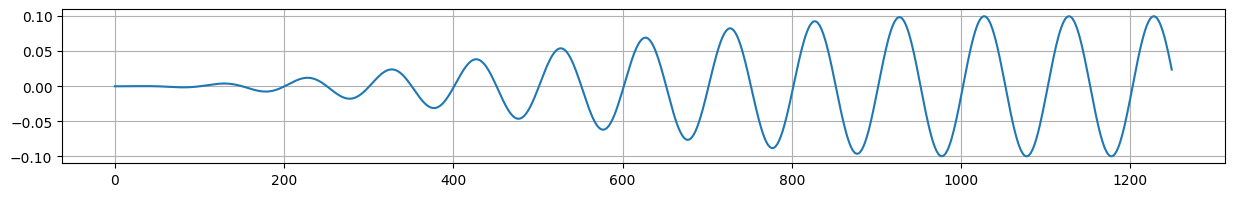

In [94]:
plot_signal(faded_interpolated_scaled_output, end=1250)

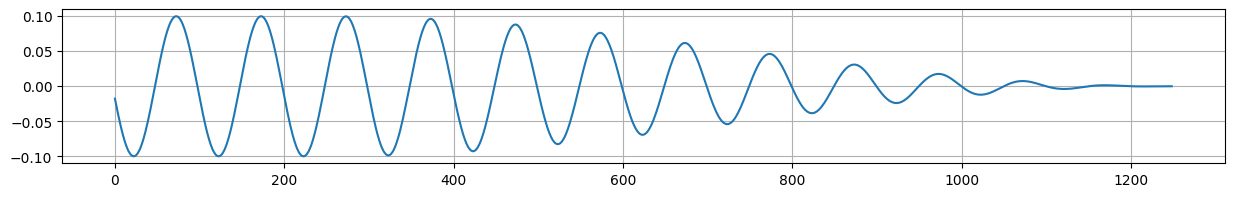

In [95]:
plot_signal(faded_interpolated_scaled_output, start=(3 * sample_rate - 1250), end=-1)